<a href="https://colab.research.google.com/github/perigor/AnalisePreditivaDelayAirlinesEUA/blob/main/AnaliseDelayAirlinesEUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
# Importando Bibliotecas.

import pandas as pd
import numpy as np

# Plotagem de Graficos.

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelagem.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [233]:
# importando base de dados.

df = pd.read_csv('/content/Airlines.csv')

In [234]:
# Verificando cabeçalho.
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [235]:
# Verificando quantidade de linhas e colunas.

df.shape

(539383, 9)

In [236]:
# Verificar dados duplicados.

df.duplicated().sum()

0

In [237]:
# Verificando nome de colunas.

df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [238]:
# Informações gerais.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [239]:
# Dados estatísticos.

df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


# 1 - Desempenho geral da companhia aérea:

* **Qual é o desempenho geral das companhias aéreas em termos de atrasos?**

In [240]:
# Usando a função groupby para agrupar df por companhia aérea e calcular médidas estatísticas.

desempenho_companhias = df.groupby('Airline')['Delay'].agg(['count', 'mean', 'median', 'sum']).reset_index()

In [241]:
# Ordenando o df pelo total de atrasos em ordem decrescente.

desempenho_companhias = desempenho_companhias.sort_values(by='sum', ascending=False)

In [242]:
# Organizando em tabela.

desempenho_companhias.reset_index()

,index,Airline,count,mean,median,sum
0,15,WN,94097,0.697759,1.0,65657
1,5,DL,60940,0.450476,0.0,27452
2,12,OO,50254,0.452899,0.0,22760
3,1,AA,45656,0.388470,0.0,17736
4,10,MQ,36605,0.348095,0.0,12742
5,4,CO,21118,0.566199,1.0,11957
6,16,XE,31126,0.378944,0.0,11795
7,14,US,34500,0.335971,0.0,11591
8,6,EV,27983,0.402208,0.0,11255
9,13,UA,27619,0.323907,0.0,8946


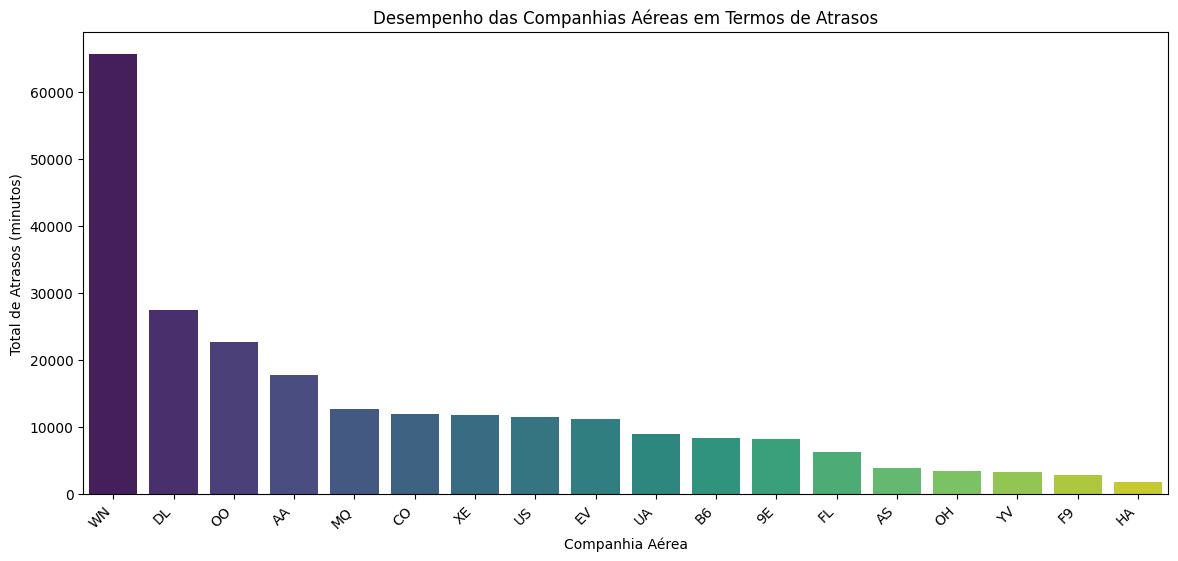

In [243]:
# Gráfico de barras para visualizar o desempenho das companhias aéreas.

plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='sum', data=desempenho_companhias, palette='viridis')
plt.title('Desempenho das Companhias Aéreas em Termos de Atrasos')
plt.xlabel('Companhia Aérea')
plt.ylabel('Total de Atrasos (minutos)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Para cada companhia aérea, calculamos o número total de voos, a média e mediana dos atrasos, e o total de minutos de atraso.

Ordenado as companhias aéreas com os maiores totais de atrasos no topo da lista, ajudando a avaliar como as companhias aéreas se saem em termos de pontualidade, destacando aquelas com maiores problemas de atrasos.

- A companhia aérea 'WN' (Southwest Airlines) tem a maior contagem de voos e o maior total de atrasos, indicando uma quantidade significativa de voos e atrasos.
- A companhia  'YV' (Mesa Airlines) tem a menor média de atraso, sugerindo a menor quantidade média de atraso por voo.

A mediana de atraso de 0.0 para várias companhias indica que muitos voos não tiveram atrasos, mas a média pode ser influenciada por atrasos mais longos em alguns voos.


* **Existem grandes variações entre elas?**


In [244]:
# Agrupando o df por companhia aérea e calculando o desvio padrão dos atrasos.

variacao_atrasos = df.groupby('Airline')['Delay'].std().reset_index()

In [245]:
# Organizando em tabela.

variacao_atrasos.reset_index()

,index,Airline,Delay
0,0,9E,0.489426
1,1,AA,0.487408
2,2,AS,0.473489
3,3,B6,0.498926
4,4,CO,0.495610
5,5,DL,0.497545
6,6,EV,0.490352
7,7,F9,0.497435
8,8,FL,0.458830
9,9,HA,0.466590


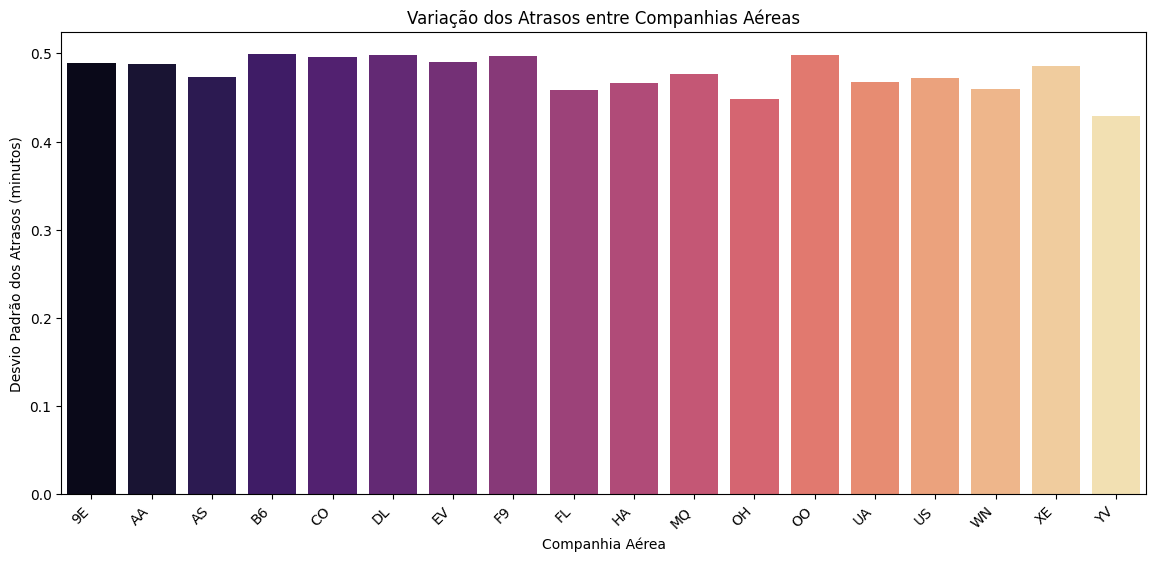

In [246]:
# Gráfico de barras para visualizar a variação dos atrasos entre as companhias aéreas.

plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='Delay', data=variacao_atrasos, palette='magma')
plt.title('Variação dos Atrasos entre Companhias Aéreas')
plt.xlabel('Companhia Aérea')
plt.ylabel('Desvio Padrão dos Atrasos (minutos)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

O resultado apresenta o desvio padrão dos atrasos para diferentes companhias aéreas. O desvio padrão é uma medida de dispersão, indicando quão consistentes ou variáveis são os atrasos para cada companhia aérea. Em resumo, os valores mostram o quão dispersos estão os atrasos em relação à média para cada companhia aérea:

* A companhia aérea com o maior desvio padrão é 'B6' (JetBlue Airways) com aproximadamente 0.499, indicando uma variabilidade maior nos atrasos.
* A companhia aérea com o menor desvio padrão é 'YV' (Mesa Airlines) com aproximadamente 0.429, indicando uma variabilidade menor nos atrasos.

---------------------------------------------------------------------------------

# 2 - Aeroportos mais afetados:


* **Quais aeroportos têm os maiores índices de atrasos de voos de partida e chegada?**

In [247]:
# Para atrasos de partida.

# Agrupando o df pela coluna 'AirportFrom' (aeroporto de partida) e calculando variáveis estatísticas sobre os atrasos.

atrasos_partida = df.groupby('AirportFrom')['Delay'].agg(['count', 'mean', 'median', 'sum']).reset_index()

#Renomeando as colunas do df 'atrasos_partida' para torná-las mais descritivas.
# Agora, temos  colunas como 'Aeroporto', 'Total Voos Partida', 'Média Atraso Partida', 'Mediana Atraso Partida' e 'Total Atrasos Partida'.

atrasos_partida.columns = ['Aeroporto', 'Total Voos Partida', 'Média Atraso Partida', 'Mediana Atraso Partida', 'Total Atrasos Partida']

# Ordenando o df 'atrasos_partida' com base na coluna 'Total Atrasos Partida' em ordem decrescente.

atrasos_partida = atrasos_partida.sort_values(by='Total Atrasos Partida', ascending=False)

In [248]:
# Printando resultados para atrasos de partida.

print("Atrasos de Partida:")
atrasos_partida.reset_index()

Atrasos de Partida:


,index,Aeroporto,Total Voos Partida,Média Atraso Partida,Mediana Atraso Partida,Total Atrasos Partida
0,16,ATL,34449,0.423844,0.0,14601
1,208,ORD,24822,0.479655,0.0,11906
2,79,DEN,19843,0.475382,0.0,9433
3,80,DFW,22154,0.397626,0.0,8809
4,154,LAX,16657,0.496488,0.0,8270
...,...,...,...,...,...,...
288,8,ADK,9,0.555556,1.0,5
289,274,TEX,27,0.148148,0.0,4
290,259,SJT,15,0.266667,0.0,4
291,189,MMH,16,0.250000,0.0,4


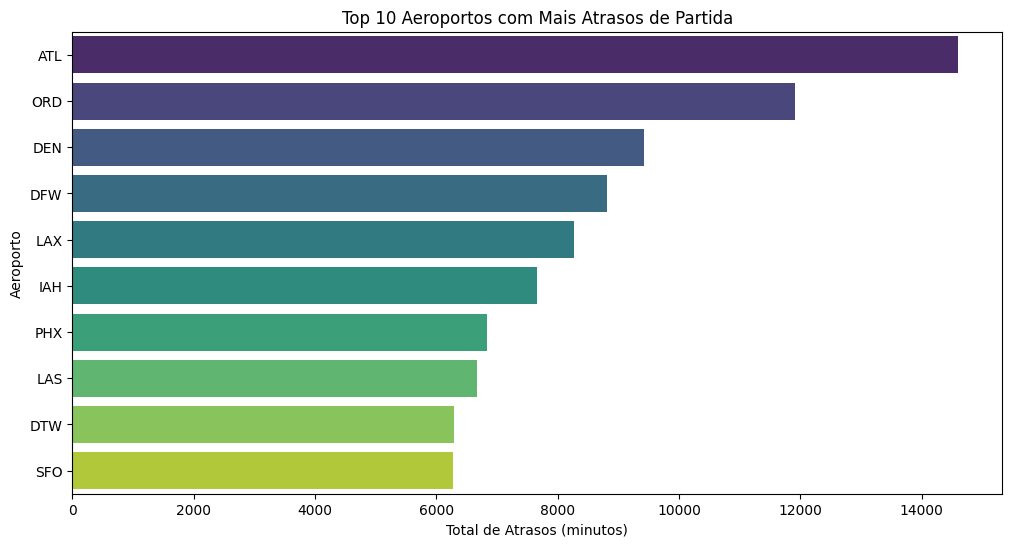

In [249]:
# Plotagem de gráfico para 10 aeroportos com mais atrasos de partida.

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Atrasos Partida', y='Aeroporto', data=atrasos_partida.head(10), palette='viridis')
plt.title('Top 10 Aeroportos com Mais Atrasos de Partida')
plt.xlabel('Total de Atrasos (minutos)')
plt.ylabel('Aeroporto')
plt.show()

In [250]:
# Para atrasos de chegada

# Agrupando o df df pela coluna 'AirportTo' (aeroporto de chegada) e calculando variáveis estatísticas sobre os atrasos.

atrasos_chegada = df.groupby('AirportTo')['Delay'].agg(['count', 'mean', 'median', 'sum']).reset_index()

#Renomeando as colunas do df 'atrasos_chegada' para torná-las mais descritivas.
# Agora, temos  colunas como 'Aeroporto', 'Total Voos Partida', 'Média Atraso Partida', 'Mediana Atraso Partida' e 'Total Atrasos Partida'.

atrasos_chegada.columns = ['Aeroporto', 'Total Voos Chegada', 'Média Atraso Chegada', 'Mediana Atraso Chegada', 'Total Atrasos Chegada']

# Ordenando o df 'atrasos_chegada' com base na coluna 'Total Atrasos Chegada' em ordem decrescente.

atrasos_chegada = atrasos_chegada.sort_values(by='Total Atrasos Chegada', ascending=False)


In [251]:
# Printando resultados para atrasos de chegada.

print("\nAtrasos de Chegada:")
atrasos_chegada.reset_index()


Atrasos de Chegada:


,index,Aeroporto,Total Voos Chegada,Média Atraso Chegada,Mediana Atraso Chegada,Total Atrasos Chegada
0,16,ATL,34440,0.383769,0.0,13217
1,208,ORD,24871,0.373728,0.0,9295
2,79,DEN,19848,0.436114,0.0,8656
3,154,LAX,16656,0.492255,0.0,8199
4,217,PHX,15558,0.456357,0.0,7100
...,...,...,...,...,...,...
288,125,GUM,10,0.500000,0.5,5
289,113,GGG,31,0.161290,0.0,5
290,286,UTM,18,0.222222,0.0,4
291,3,ABR,2,0.500000,0.5,1


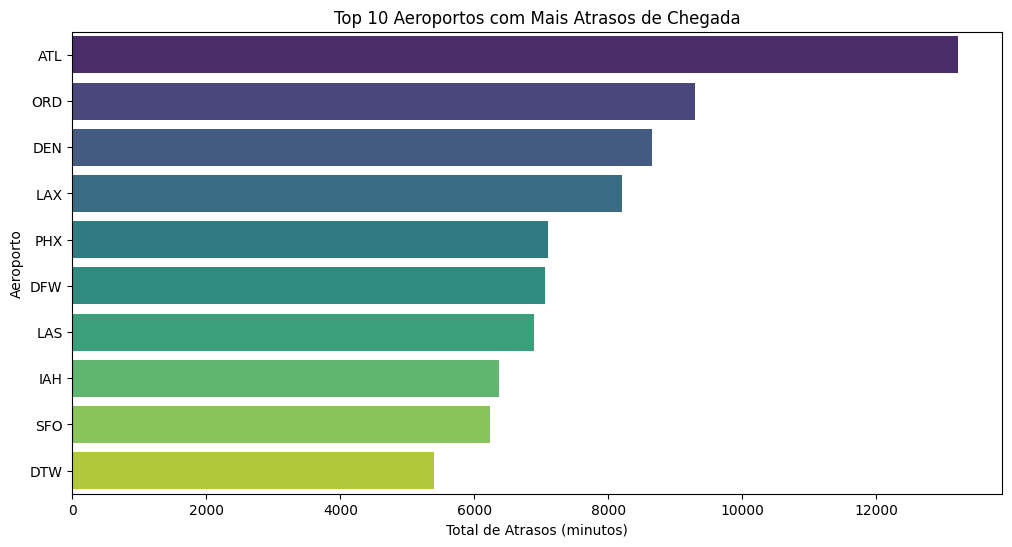

In [252]:
# Plotagem de gráfico para 10 aeroportos com mais atrasos de chegada.

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Atrasos Chegada', y='Aeroporto', data=atrasos_chegada.head(10), palette='viridis')
plt.title('Top 10 Aeroportos com Mais Atrasos de Chegada')
plt.xlabel('Total de Atrasos (minutos)')
plt.ylabel('Aeroporto')
plt.show()

- Atrasos de Partida / Atraso de Chegada

Agrupamos os dados pelos aeroportos de partida.

Para cada aeroporto, calculamos estatísticas, como o número total de voos, a média e a mediana dos atrasos, e o total de minutos de atraso.
Ordenamos os resultados para mostrar os aeroportos com os maiores totais de atrasos de partida.

* Resultados:

Os resultados fornecem insights sobre quais aeroportos tendem a ter mais atrasos em voos de partida e chegada.
Isso pode ajudar a identificar áreas onde melhorias podem ser necessárias, como otimização de processos nos aeroportos ou ajustes nas operações das companhias aéreas.

**Observação:** Para uma análise mais precisa, é importante considerar outros fatores, como aeroportos de conexão, condições meteorológicas e políticas específicas de cada local., porém não temos esses dados.

-----------------------------------------------------------------------------------

#3 - Dia da semana com maior número de atrasos:


* **Em qual dia da semana os atrasos são mais comuns?**

In [253]:
# Agrupando os dados pelo dia da semana e por dalay.

atrasos_por_dia = df.groupby('DayOfWeek')['Delay'].sum().reset_index()


In [254]:
# Indetificando  os dias da semana.

dias_da_semana = {1: 'Domingo', 2: 'Segunda', 3: 'Terça', 4: 'Quarta', 5: 'Quinta', 6: 'Sexta', 7: 'Sabado'}

# Indentificando os dias da semana correspondentes aos valores originais na coluna 'DayOfWeek'.

atrasos_por_dia['DiaOfWeek'] = atrasos_por_dia['DayOfWeek'].map(dias_da_semana)

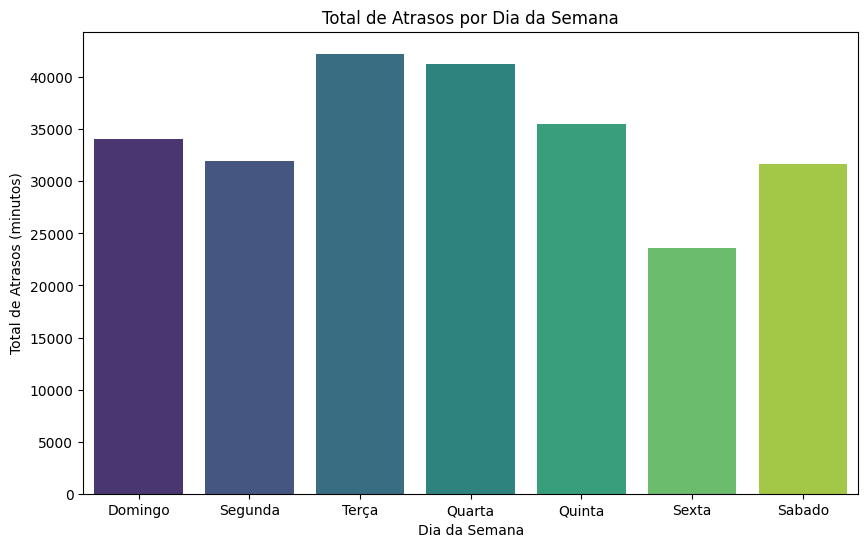

In [255]:
# Plotagem de gráfico para identificar os dias da semana com mais atrasos.

plt.figure(figsize=(10, 6))
sns.barplot(x='DiaOfWeek', y='Delay', data=atrasos_por_dia, palette='viridis')
plt.title('Total de Atrasos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Atrasos (minutos)')
plt.show()

#4 - Distribuição da Duração dos Atrasos:







* **Como está distribuída a duração dos atrasos?**



In [256]:
# Criando uma nova coluna indicando se o atraso é curto ou longo.

df['TipoAtraso'] = pd.cut(df['Delay'], bins=[-float('inf'), 30, float('inf')], labels=['Curto', 'Longo'])


In [257]:
# Contagem total de atrasos curtos e longos.

contagem_tipos_atraso = df['TipoAtraso'].value_counts().reset_index()


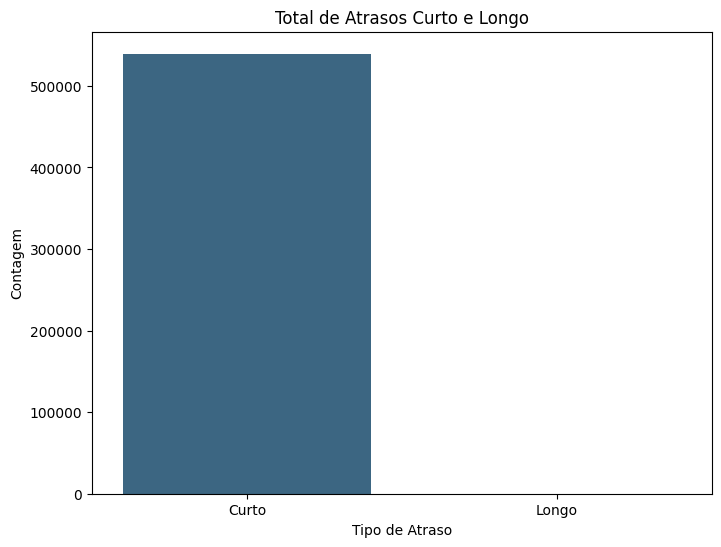

In [258]:
# Plotagem de grafico para identificação de atraso cursto e longos.

plt.figure(figsize=(8, 6))
sns.barplot(x='index', y='TipoAtraso', data=contagem_tipos_atraso, palette='viridis')
plt.title('Total de Atrasos Curto e Longo')
plt.xlabel('Tipo de Atraso')
plt.ylabel('Contagem')
plt.show()

O gráfico de barras mostra visualmente se há mais atrasos considerados "curtos" ou "longos".

Isso pode ser útil para entender se a maioria dos atrasos é de curta duração ou se existem muitos atrasos que demoram mais para serem resolvidos.



---







In [259]:
df.dtypes

id                int64
Airline          object
Flight            int64
AirportFrom      object
AirportTo        object
DayOfWeek         int64
Time              int64
Length            int64
Delay             int64
TipoAtraso     category
dtype: object

# 5 - Tratamento des dados catégóricos

In [260]:
# Tratando variáveis categóricas.

label_encoder = LabelEncoder()
df['Airline'] = label_encoder.fit_transform(df['Airline'])
df['AirportFrom'] = label_encoder.fit_transform(df['AirportFrom'])
df['AirportTo'] = label_encoder.fit_transform(df['AirportTo'])
df['TipoAtraso'] = label_encoder.fit_transform(df['TipoAtraso'])

In [283]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TipoAtraso
0,1,4,269,253,135,3,15,205,1,0
1,2,14,1558,217,60,3,15,222,1,0
2,3,1,2400,154,80,3,20,165,1,0
3,4,1,2466,253,80,3,20,195,1,0
4,5,2,108,14,252,3,30,202,0,0




---

# 6 - Modelos de aprendizagem

6.1 - SEPAÇÃO DE BASES "X, Y" E "TEINO E TESTE"


In [261]:
# Separando features e target.

X = df.drop(['id', 'Delay'], axis=1)
y = df['Delay']

In [262]:
# Dividindo o conjunto de dados em treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**REGRESSÃO LOGISTICA**

In [263]:
# Treinando o modelo de Regressão Logística.

modelo_log_reg = LogisticRegression(random_state=42)
modelo_log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [264]:
# Fazendo previsões no conjunto de teste.

y_pred = modelo_log_reg.predict(X_test)


In [265]:
# Métricas de desempenho.

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

In [266]:
# Imprimindo métricas de desempenho.

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)

Acurácia: 0.5695
Precisão: 0.5254
Recall: 0.3353
F1-score: 0.4094
AUC-ROC: 0.5463
Matriz de Confusão:
[[45342 14537]
 [31903 16095]]


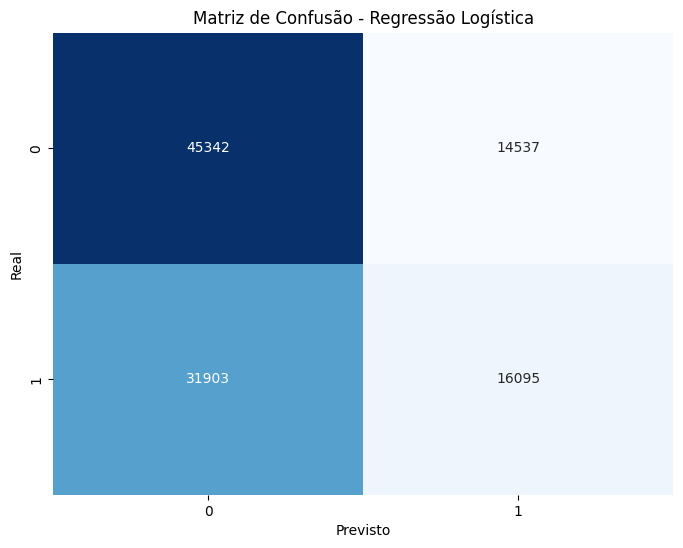

In [267]:
# Plotando a matriz de confusão.

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

**RANDOM FOREST**

In [268]:
# Treinando o modelo de Random Forest

modelo_random_forest = RandomForestClassifier(random_state=42)
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [269]:
# Fazendo previsões no conjunto de teste.

y_pred = modelo_random_forest.predict(X_test)

In [270]:
# Métricas de desempenho.

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

In [271]:
# Imprimindo métricas.

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)

Acurácia: 0.6205
Precisão: 0.5756
Recall: 0.5595
F1-score: 0.5674
AUC-ROC: 0.6144
Matriz de Confusão:
[[40079 19800]
 [21143 26855]]


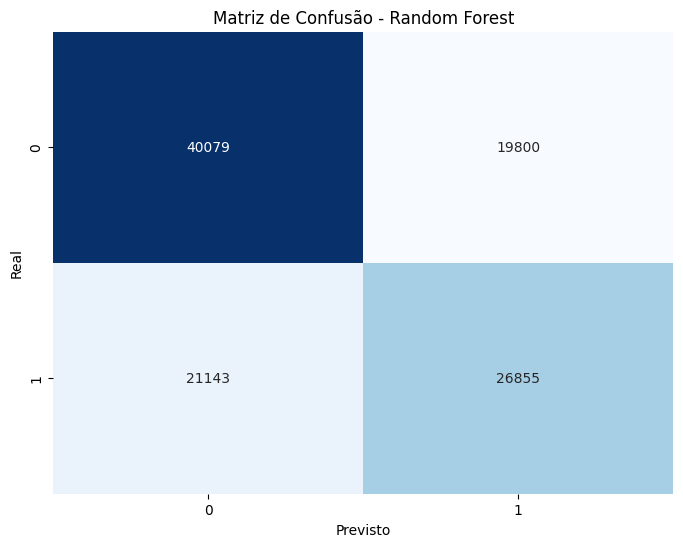

In [272]:
# Plotando a matriz de confusão.

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

**XGBOOST**

In [273]:
# Treinando o modelo XGBoost.

modelo_xgboost = XGBClassifier(random_state=42)
modelo_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [274]:
# Fazendo previsões no conjunto de teste.

y_pred = modelo_xgboost.predict(X_test)

In [275]:
# Métricas de desempenho.

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

In [276]:
# Imprimindo métricas.

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)

Acurácia: 0.6658
Precisão: 0.6643
Recall: 0.5032
F1-score: 0.5726
AUC-ROC: 0.6497
Matriz de Confusão:
[[47675 12204]
 [23847 24151]]


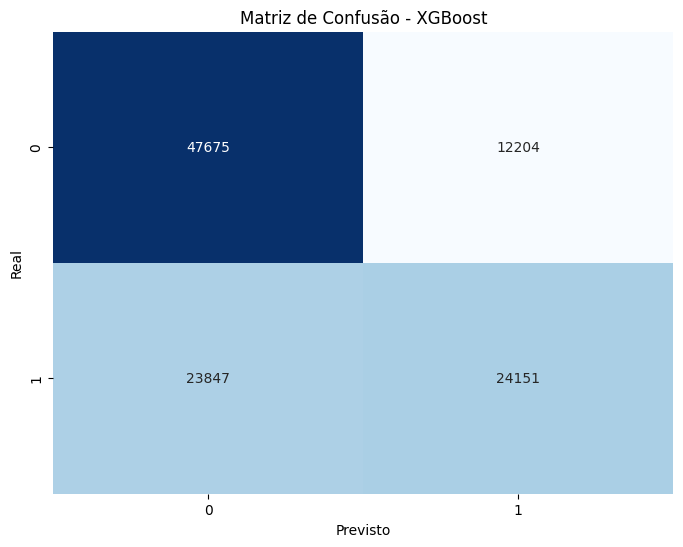

In [277]:
# Plotando a matriz de confusão.

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - XGBoost')
plt.show()

**ADABOOST**

In [278]:
# Treinando o modelo AdaBoost
modelo_adaboost = AdaBoostClassifier(random_state=42)
modelo_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [279]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_adaboost.predict(X_test)

In [280]:
# Métricas de desempenho
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

In [281]:
# Imprimir métricas
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao)


Acurácia: 0.6430
Precisão: 0.6446
Recall: 0.4406
F1-score: 0.5234
AUC-ROC: 0.6229
Matriz de Confusão:
[[48222 11657]
 [26852 21146]]


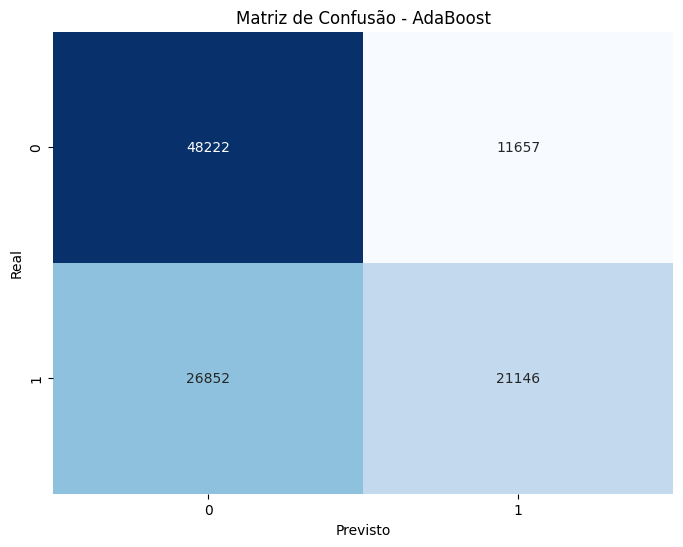

In [282]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - AdaBoost')
plt.show()

**Conclusões Gerais:**

A avaliação do desempenho de um modelo depende do contexto específico do problema e dos requisitos específicos do negócio. No entanto, podemos fazer algumas observações com base nas métricas fornecidas:

Acurácia:

XGBoost tem a maior acurácia (66,58%), seguido por AdaBoost (64,30%), Random Forest (62,05%), e Regressão Logística (56,95%).
Precisão:

XGBoost tem a maior precisão (66,43%), seguido por AdaBoost (64,46%), Random Forest (57,56%), e Regressão Logística (52,54%).
Recall:

Random Forest tem o maior recall (55,95%), seguido por XGBoost (50,32%), AdaBoost (44,06%), e Regressão Logística (33,53%).
F1-score:

XGBoost tem o maior F1-score (57,26%), seguido por Random Forest (56,74%), AdaBoost (52,34%), e Regressão Logística (40,94%).
AUC-ROC:

XGBoost tem a maior AUC-ROC (64,97%), seguido por AdaBoost (62,29%), Random Forest (61,44%), e Regressão Logística (54,63%).

Considerando essas métricas, o modelo XGBoost parece ter um desempenho geral melhor em comparação com os outros modelos, especialmente em termos de acurácia, precisão e AUC-ROC.

